In [32]:
# PCA

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [32] used 0.0000 MiB RAM in 0.10s, peaked 0.00 MiB above current, total RAM usage 108.82 MiB


In [33]:
# Importing the datset
dataset = pd.read_csv("Wine.csv")
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values

In [33] used 0.4648 MiB RAM in 0.11s, peaked 0.00 MiB above current, total RAM usage 109.29 MiB


In [34]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [34] used 0.0273 MiB RAM in 0.10s, peaked 0.00 MiB above current, total RAM usage 109.32 MiB


In [35]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [35] used 0.0234 MiB RAM in 0.11s, peaked 0.00 MiB above current, total RAM usage 109.34 MiB


In [36]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([ 0.36884109,  0.19318394])

In [36] used 0.0195 MiB RAM in 0.11s, peaked 0.00 MiB above current, total RAM usage 109.36 MiB


In [39]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [39] used 0.1797 MiB RAM in 0.12s, peaked 0.00 MiB above current, total RAM usage 109.73 MiB


In [41]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[14,  0,  0],
       [ 1, 15,  0],
       [ 0,  0,  6]])

In [41] used 0.0039 MiB RAM in 0.12s, peaked 0.00 MiB above current, total RAM usage 109.76 MiB


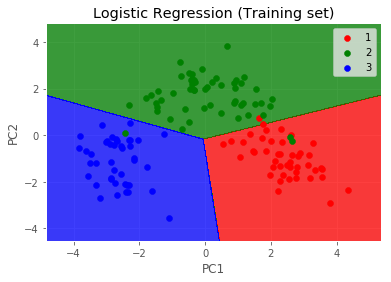

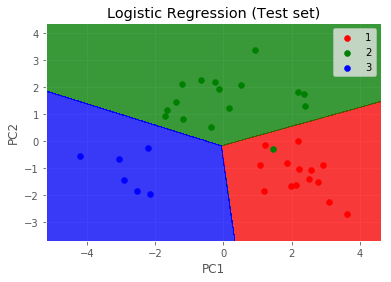

In [43] used 106.3438 MiB RAM in 0.74s, peaked 0.00 MiB above current, total RAM usage 216.11 MiB


In [43]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()